# 판다스(pandas) 기본 사용법 익히기
* 아래의 블로그 포스트를 참고하여 실습 공부했습니다.   
[Reference URL](https://dandyrilla.github.io/2017-08-12/pandas-10min/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 오브젝트 생성하기
### 1.1 Series
* 1차원 배열의 형태를 가짐
* 인덱스 기준으로 데이터가 함께 저장됨
* index를 따로 지정하지 않으면 기본적으로 0부터 증가하는 정수 인덱스가 사용됨

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### 2.1 DataFrame
* 2차원 배열의 형태를 가짐
* 인덱스, 칼럼 2가지 기준으로 데이터가 저장됨
* pd.DataFrame(index, columns)
 * DataFrame을 만들기 위한 클래스 생성자
 * index, columns : 인덱스, 칼럼에 해당되는 인수

In [3]:
dates = pd.date_range('20201021', periods = 6)
dates

DatetimeIndex(['2020-10-21', '2020-10-22', '2020-10-23', '2020-10-24',
               '2020-10-25', '2020-10-26'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2020-10-21,-0.370459,-0.220163,0.540241,-0.370654
2020-10-22,0.820585,-0.868054,-0.621816,1.441998
2020-10-23,-0.160072,-0.292860,0.206953,1.309517
2020-10-24,1.591317,-0.554253,-0.906738,-0.426208
2020-10-25,0.965714,2.282430,0.758384,-1.345279
2020-10-26,1.119092,-0.176078,0.128223,-0.429817


* DataFrame을 생성하는 다른 방법
 * dictionary 이용
 * dict의 key -> 열을 정의하는 칼럼 
 * dict의 index -> 0부터 1씩 증가하는 정수 인덱스

In [5]:
df2 = pd.DataFrame({
    'A' : 1,
    'B' : pd.Timestamp('20201021'),
    'C' : pd.Series(1, index=list(range(4)), dtype='float32'),
    'D' : np.array([3]*4, dtype='int32'),
    'E' : pd.Categorical(['test', 'train', 'test', 'train']),
    'F' : 'foo'
})
df2

,A,B,C,D,E,F
0,1,2020-10-21,1.0,3,test,foo
1,1,2020-10-21,1.0,3,train,foo
2,1,2020-10-21,1.0,3,test,foo
3,1,2020-10-21,1.0,3,train,foo


* dtypes -> DataFrame 칼럼의 자료형 확인
 * float62 : 파이썬 소수점
 * object : 문자열 자료형

In [6]:
df2.dtypes

A             int64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

#### df2. + tap 키를 눌러서 다른 클래스 속성을 확인할 수 있음

# 2. 데이터 확인하기
* .head(), .tail() : 상위, 하위 5개
* .index : 인덱스 속성 
* .columns : 칼럼 속성
* .values : numpy 데이터 확인
* describe() : 칼럼별 데이터 개수, 평균값, 표준편차, 최솟값, 4분위수, 최댓값
* .T : index와 column을 바꾼 형태의 DataFrame
* .sort_index() : 행, 열 이름 정렬
 * axis=0 : 인덱스 기준 정렬 (기본값)
 * axis=1 : 칼럼 기준 정렬
 * ascending=True : 오름차순 정렬 (기본값)
 * ascending=False : 내림차순 정렬
* .sort_values(by='B') : B 칼럼에 대해 정렬

In [7]:
df.head()

,A,B,C,D
2020-10-21,-0.370459,-0.220163,0.540241,-0.370654
2020-10-22,0.820585,-0.868054,-0.621816,1.441998
2020-10-23,-0.160072,-0.292860,0.206953,1.309517
2020-10-24,1.591317,-0.554253,-0.906738,-0.426208
2020-10-25,0.965714,2.282430,0.758384,-1.345279


In [8]:
df.tail()

,A,B,C,D
2020-10-22,0.820585,-0.868054,-0.621816,1.441998
2020-10-23,-0.160072,-0.292860,0.206953,1.309517
2020-10-24,1.591317,-0.554253,-0.906738,-0.426208
2020-10-25,0.965714,2.282430,0.758384,-1.345279
2020-10-26,1.119092,-0.176078,0.128223,-0.429817


In [9]:
df.index

DatetimeIndex(['2020-10-21', '2020-10-22', '2020-10-23', '2020-10-24',
               '2020-10-25', '2020-10-26'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[-0.37045908, -0.22016299,  0.5402413 , -0.37065361],
       [ 0.82058514, -0.86805432, -0.62181604,  1.44199775],
       [-0.16007217, -0.29285968,  0.20695275,  1.30951729],
       [ 1.59131725, -0.55425267, -0.90673842, -0.42620839],
       [ 0.96571355,  2.28242991,  0.75838411, -1.34527927],
       [ 1.11909203, -0.17607848,  0.12822284, -0.42981746]])

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.661029,0.028504,0.017541,0.029926
std,0.765731,1.134069,0.653186,1.104751
min,-0.370459,-0.868054,-0.906738,-1.345279
25%,0.085092,-0.488904,-0.434306,-0.428915
50%,0.893149,-0.256511,0.167588,-0.398431
75%,1.080747,-0.187100,0.456919,0.889475
max,1.591317,2.282430,0.758384,1.441998


In [13]:
df.T

,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26
A,-0.370459,0.820585,-0.160072,1.591317,0.965714,1.119092
B,-0.220163,-0.868054,-0.292860,-0.554253,2.282430,-0.176078
C,0.540241,-0.621816,0.206953,-0.906738,0.758384,0.128223
D,-0.370654,1.441998,1.309517,-0.426208,-1.345279,-0.429817


In [14]:
df.sort_index()

,A,B,C,D
2020-10-21,-0.370459,-0.220163,0.540241,-0.370654
2020-10-22,0.820585,-0.868054,-0.621816,1.441998
2020-10-23,-0.160072,-0.292860,0.206953,1.309517
2020-10-24,1.591317,-0.554253,-0.906738,-0.426208
2020-10-25,0.965714,2.282430,0.758384,-1.345279
2020-10-26,1.119092,-0.176078,0.128223,-0.429817


In [15]:
df.sort_index(axis=1)

,A,B,C,D
2020-10-21,-0.370459,-0.220163,0.540241,-0.370654
2020-10-22,0.820585,-0.868054,-0.621816,1.441998
2020-10-23,-0.160072,-0.292860,0.206953,1.309517
2020-10-24,1.591317,-0.554253,-0.906738,-0.426208
2020-10-25,0.965714,2.282430,0.758384,-1.345279
2020-10-26,1.119092,-0.176078,0.128223,-0.429817


In [16]:
df.sort_index(ascending=False)

,A,B,C,D
2020-10-26,1.119092,-0.176078,0.128223,-0.429817
2020-10-25,0.965714,2.282430,0.758384,-1.345279
2020-10-24,1.591317,-0.554253,-0.906738,-0.426208
2020-10-23,-0.160072,-0.292860,0.206953,1.309517
2020-10-22,0.820585,-0.868054,-0.621816,1.441998
2020-10-21,-0.370459,-0.220163,0.540241,-0.370654


In [17]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2020-10-21,-0.370654,0.540241,-0.220163,-0.370459
2020-10-22,1.441998,-0.621816,-0.868054,0.820585
2020-10-23,1.309517,0.206953,-0.292860,-0.160072
2020-10-24,-0.426208,-0.906738,-0.554253,1.591317
2020-10-25,-1.345279,0.758384,2.282430,0.965714
2020-10-26,-0.429817,0.128223,-0.176078,1.119092


In [18]:
df.sort_values(by='B')

,A,B,C,D
2020-10-22,0.820585,-0.868054,-0.621816,1.441998
2020-10-24,1.591317,-0.554253,-0.906738,-0.426208
2020-10-23,-0.160072,-0.292860,0.206953,1.309517
2020-10-21,-0.370459,-0.220163,0.540241,-0.370654
2020-10-26,1.119092,-0.176078,0.128223,-0.429817
2020-10-25,0.965714,2.282430,0.758384,-1.345279


# 3. 데이터 선택하기 (Selection)
* df['A'], df.A : 특정 칼럼 값 추출
* df[0:3] : 0~2 까지의 행 추출
* df['2020-10-21':'2020-10-25'] : 인덱스 행 추출

In [21]:
df

,A,B,C,D
2020-10-21,-0.370459,-0.220163,0.540241,-0.370654
2020-10-22,0.820585,-0.868054,-0.621816,1.441998
2020-10-23,-0.160072,-0.292860,0.206953,1.309517
2020-10-24,1.591317,-0.554253,-0.906738,-0.426208
2020-10-25,0.965714,2.282430,0.758384,-1.345279
2020-10-26,1.119092,-0.176078,0.128223,-0.429817


In [19]:
df['A']

2020-10-21   -0.370459
2020-10-22    0.820585
2020-10-23   -0.160072
2020-10-24    1.591317
2020-10-25    0.965714
2020-10-26    1.119092
Freq: D, Name: A, dtype: float64

In [20]:
df.A

2020-10-21   -0.370459
2020-10-22    0.820585
2020-10-23   -0.160072
2020-10-24    1.591317
2020-10-25    0.965714
2020-10-26    1.119092
Freq: D, Name: A, dtype: float64

In [22]:
df[0:2]

,A,B,C,D
2020-10-21,-0.370459,-0.220163,0.540241,-0.370654
2020-10-22,0.820585,-0.868054,-0.621816,1.441998


In [27]:
df['2020-10-21':'2020-10-25']

,A,B,C,D
2020-10-21,-0.370459,-0.220163,0.540241,-0.370654
2020-10-22,0.820585,-0.868054,-0.621816,1.441998
2020-10-23,-0.160072,-0.292860,0.206953,1.309517
2020-10-24,1.591317,-0.554253,-0.906738,-0.426208
2020-10-25,0.965714,2.282430,0.758384,-1.345279


### 3.1 이름을 이용한 선택하기 : .loc
* index가 '2020-10-21'인 칼럼 값 가져오기
 * df.loc['20201021'], df.loc['2020-10-21']

In [28]:
df.loc['20201021']

A   -0.370459
B   -0.220163
C    0.540241
D   -0.370654
Name: 2020-10-21 00:00:00, dtype: float64

In [29]:
df.loc['2020-10-21']

A   -0.370459
B   -0.220163
C    0.540241
D   -0.370654
Name: 2020-10-21 00:00:00, dtype: float64

* 칼럼 A, B에 대한 모든 정보 가져오기

In [31]:
df.loc[: ,['A', 'B']]

,A,B
2020-10-21,-0.370459,-0.220163
2020-10-22,0.820585,-0.868054
2020-10-23,-0.160072,-0.292860
2020-10-24,1.591317,-0.554253
2020-10-25,0.965714,2.282430
2020-10-26,1.119092,-0.176078


* 2020-10-21 부터 2020-10-24 까지 A, C 칼럼 값 가져오기

In [33]:
df.loc['20201021':'20201024', ['A', 'C']]

,A,C
2020-10-21,-0.370459,0.540241
2020-10-22,0.820585,-0.621816
2020-10-23,-0.160072,0.206953
2020-10-24,1.591317,-0.906738


### 3.2 위치를 이용한 선택하기 : .iloc
* df.iloc[3] : 행번호가 3인 row

In [34]:
df.iloc[3]

A    1.591317
B   -0.554253
C   -0.906738
D   -0.426208
Name: 2020-10-24 00:00:00, dtype: float64

* 3:5번째 row, 0:2 번째 column

In [35]:
df.iloc[3:5, 0:2]

,A,B
2020-10-24,1.591317,-0.554253
2020-10-25,0.965714,2.282430


In [36]:
df.iloc[[1,2,4], [0, 2]]

,A,C
2020-10-22,0.820585,-0.621816
2020-10-23,-0.160072,0.206953
2020-10-25,0.965714,0.758384


In [37]:
df.iloc[1:3, :]

,A,B,C,D
2020-10-22,0.820585,-0.868054,-0.621816,1.441998
2020-10-23,-0.160072,-0.292860,0.206953,1.309517


In [38]:
df.iloc[:, 1:3]

,B,C
2020-10-21,-0.220163,0.540241
2020-10-22,-0.868054,-0.621816
2020-10-23,-0.292860,0.206953
2020-10-24,-0.554253,-0.906738
2020-10-25,2.282430,0.758384
2020-10-26,-0.176078,0.128223


### 3.3 조건을 이용하여 선택하기
* df[df.A > 0 ]

In [39]:
df[df.A > 0]

,A,B,C,D
2020-10-22,0.820585,-0.868054,-0.621816,1.441998
2020-10-24,1.591317,-0.554253,-0.906738,-0.426208
2020-10-25,0.965714,2.282430,0.758384,-1.345279
2020-10-26,1.119092,-0.176078,0.128223,-0.429817


In [40]:
df[df > 0]

,A,B,C,D
2020-10-21,NaN,NaN,0.540241,NaN
2020-10-22,0.820585,NaN,NaN,1.441998
2020-10-23,NaN,NaN,0.206953,1.309517
2020-10-24,1.591317,NaN,NaN,NaN
2020-10-25,0.965714,2.28243,0.758384,NaN
2020-10-26,1.119092,NaN,0.128223,NaN


* isin() 메소드로 조건 이용한 데이터 선택

In [41]:
df2 = df.copy()
df2['E'] = [1, 2, 3, 4, 5, 6]
df2

,A,B,C,D,E
2020-10-21,-0.370459,-0.220163,0.540241,-0.370654,1
2020-10-22,0.820585,-0.868054,-0.621816,1.441998,2
2020-10-23,-0.160072,-0.292860,0.206953,1.309517,3
2020-10-24,1.591317,-0.554253,-0.906738,-0.426208,4
2020-10-25,0.965714,2.282430,0.758384,-1.345279,5
2020-10-26,1.119092,-0.176078,0.128223,-0.429817,6


In [44]:
df2[df2['E'].isin([2, 4])]

,A,B,C,D,E
2020-10-22,0.820585,-0.868054,-0.621816,1.441998,2
2020-10-24,1.591317,-0.554253,-0.906738,-0.426208,4


### 3.4 데이터 변경하기

In [45]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20201023', periods=6))
s1

2020-10-23    1
2020-10-24    2
2020-10-25    3
2020-10-26    4
2020-10-27    5
2020-10-28    6
Freq: D, dtype: int64

In [46]:
df['F'] = s1
df

,A,B,C,D,F
2020-10-21,-0.370459,-0.220163,0.540241,-0.370654,NaN
2020-10-22,0.820585,-0.868054,-0.621816,1.441998,NaN
2020-10-23,-0.160072,-0.292860,0.206953,1.309517,1.0
2020-10-24,1.591317,-0.554253,-0.906738,-0.426208,2.0
2020-10-25,0.965714,2.282430,0.758384,-1.345279,3.0
2020-10-26,1.119092,-0.176078,0.128223,-0.429817,4.0


In [49]:
df['F']['20201021'] = 10
df

,A,B,C,D,F
2020-10-21,-0.370459,-0.220163,0.540241,-0.370654,10.0
2020-10-22,0.820585,-0.868054,-0.621816,1.441998,NaN
2020-10-23,-0.160072,-0.292860,0.206953,1.309517,1.0
2020-10-24,1.591317,-0.554253,-0.906738,-0.426208,2.0
2020-10-25,0.965714,2.282430,0.758384,-1.345279,3.0
2020-10-26,1.119092,-0.176078,0.128223,-0.429817,4.0


* 양수 값을 가지는 값들만 음수로 바꿔주기

In [50]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2020-10-21,-0.370459,-0.220163,-0.540241,-0.370654,-10.0
2020-10-22,-0.820585,-0.868054,-0.621816,-1.441998,NaN
2020-10-23,-0.160072,-0.292860,-0.206953,-1.309517,-1.0
2020-10-24,-1.591317,-0.554253,-0.906738,-0.426208,-2.0
2020-10-25,-0.965714,-2.282430,-0.758384,-1.345279,-3.0
2020-10-26,-1.119092,-0.176078,-0.128223,-0.429817,-4.0


# 4. 결측치 (Missing Data)
* pandas에서는 결측치를 np.nan으로 나타냄
* dropna() : 결측치가 있는 행을 모두 버릴 때 사용
* fillna() : 결측치를 다른 값으로 채우고 싶을 때 사용
* isna() : 해당 값이 결측치인지 알고 싶을 때 사용 (True, False)

In [51]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2020-10-21,-0.370459,-0.220163,0.540241,-0.370654,10.0,NaN
2020-10-22,0.820585,-0.868054,-0.621816,1.441998,NaN,NaN
2020-10-23,-0.160072,-0.292860,0.206953,1.309517,1.0,NaN
2020-10-24,1.591317,-0.554253,-0.906738,-0.426208,2.0,NaN


In [53]:
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2020-10-21,-0.370459,-0.220163,0.540241,-0.370654,10.0,1.0
2020-10-22,0.820585,-0.868054,-0.621816,1.441998,NaN,1.0
2020-10-23,-0.160072,-0.292860,0.206953,1.309517,1.0,NaN
2020-10-24,1.591317,-0.554253,-0.906738,-0.426208,2.0,NaN


In [55]:
df1.dropna(how='any')

,A,B,C,D,F,E
2020-10-21,-0.370459,-0.220163,0.540241,-0.370654,10.0,1.0


In [56]:
df1.fillna(value=5)

,A,B,C,D,F,E
2020-10-21,-0.370459,-0.220163,0.540241,-0.370654,10.0,1.0
2020-10-22,0.820585,-0.868054,-0.621816,1.441998,5.0,1.0
2020-10-23,-0.160072,-0.292860,0.206953,1.309517,1.0,5.0
2020-10-24,1.591317,-0.554253,-0.906738,-0.426208,2.0,5.0


In [57]:
pd.isna(df1)

,A,B,C,D,F,E
2020-10-21,False,False,False,False,False,False
2020-10-22,False,False,False,False,True,False
2020-10-23,False,False,False,False,False,True
2020-10-24,False,False,False,False,False,True


# 5. 연산 (Operations)

* mean() : 평균 구하기

In [59]:
df.mean()

A    0.661029
B    0.028504
C    0.017541
D    0.029926
F    4.000000
dtype: float64

* mean(1) : index에 대해 평균 구하기

In [60]:
df.mean(1)

2020-10-21    1.915793
2020-10-22    0.193178
2020-10-23    0.412708
2020-10-24    0.340824
2020-10-25    1.132250
2020-10-26    0.928284
Freq: D, dtype: float64

### 5.1 함수 적용하기

In [63]:
df.apply(lambda x: x.max() - x.min())

A    1.961776
B    3.150484
C    1.665123
D    2.787277
F    9.000000
dtype: float64

### 5.2 히스토그램 구하기
* s.value_counts()

In [64]:
s = pd.Series(np.random.randint(0, 7, size = 10))
s

0    6
1    6
2    1
3    3
4    0
5    0
6    2
7    4
8    3
9    0
dtype: int32

In [65]:
s.value_counts()

0    3
6    2
3    2
4    1
2    1
1    1
dtype: int64

# 6. 합치기 (Merging)
* concat : 같은 형태의 자료들을 이어 하나로 만들어줌
* merge : 다른 형태의 자료를 한 칼럼을 기준으로 합침
* append : 기존 데이터 프레임에 하나의 행을 추가함

### 6.1 Concat

In [66]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.297711,-0.050384,0.495403,-0.205740
1,-0.421633,-0.386406,-0.320088,0.734076
2,0.410276,-0.352107,-1.030593,0.198538
3,0.121557,0.548186,1.540326,-1.255935
4,-1.927332,0.096559,-0.779038,-0.736632
5,0.604046,0.495234,0.120982,-0.843209
6,-0.906026,0.766786,0.422112,3.500895
7,-1.309608,1.284428,0.312291,0.290626
8,-2.720110,1.494269,-1.453774,2.144563
9,1.360234,0.202238,-1.093169,0.339156


In [67]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.297711 -0.050384  0.495403 -0.205740
 1 -0.421633 -0.386406 -0.320088  0.734076
 2  0.410276 -0.352107 -1.030593  0.198538,
           0         1         2         3
 3  0.121557  0.548186  1.540326 -1.255935
 4 -1.927332  0.096559 -0.779038 -0.736632
 5  0.604046  0.495234  0.120982 -0.843209
 6 -0.906026  0.766786  0.422112  3.500895,
           0         1         2         3
 7 -1.309608  1.284428  0.312291  0.290626
 8 -2.720110  1.494269 -1.453774  2.144563
 9  1.360234  0.202238 -1.093169  0.339156]

In [68]:
pd.concat(pieces)

,0,1,2,3
0,0.297711,-0.050384,0.495403,-0.205740
1,-0.421633,-0.386406,-0.320088,0.734076
2,0.410276,-0.352107,-1.030593,0.198538
3,0.121557,0.548186,1.540326,-1.255935
4,-1.927332,0.096559,-0.779038,-0.736632
5,0.604046,0.495234,0.120982,-0.843209
6,-0.906026,0.766786,0.422112,3.500895
7,-1.309608,1.284428,0.312291,0.290626
8,-2.720110,1.494269,-1.453774,2.144563
9,1.360234,0.202238,-1.093169,0.339156


### 6.2 Join
* key로 사용 하는 값이 중복되면 -> 모든 경우의 수를 만듦

In [77]:
left = pd.DataFrame({'key' : ['foo1', 'foo2'], 'lval' : [1, 2]})
left

,key,lval
0,foo1,1
1,foo2,2


In [78]:
right = pd.DataFrame({'key' : ['foo1', 'foo2'], 'rval' : [4, 5]})
right

,key,rval
0,foo1,4
1,foo2,5


In [79]:
merged = pd.merge(left, right, on='key')
merged

,key,lval,rval
0,foo1,1,4
1,foo2,2,5


In [80]:
left = pd.DataFrame({'key' : ['foo', 'foo'], 'lval' : [1, 2]})
right = pd.DataFrame({'key' : ['foo', 'foo'], 'rval' : [4, 5]})
merged = pd.merge(left, right, on='key')
merged

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### 6.3 Append
* 새로운 행을 기존 데이터 프레임 뒤에 추가함

In [82]:
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,1.868025,-0.993104,-0.551590,-0.518434
1,0.143693,-0.018681,-1.214545,-1.025753
2,1.111493,-3.246318,0.618588,-0.779276
3,0.128653,-0.136238,0.268964,0.679393
4,-1.308515,-0.694840,1.159336,-0.259669
5,1.098706,-0.613860,0.394131,0.754368
6,1.348261,-0.780878,-0.996277,1.090556
7,-1.406463,0.095584,0.339508,0.616451


In [83]:
s = df.iloc[3]
s

A    0.128653
B   -0.136238
C    0.268964
D    0.679393
Name: 3, dtype: float64

In [84]:
df.append(s, ignore_index=True)

,A,B,C,D
0,1.868025,-0.993104,-0.551590,-0.518434
1,0.143693,-0.018681,-1.214545,-1.025753
2,1.111493,-3.246318,0.618588,-0.779276
3,0.128653,-0.136238,0.268964,0.679393
4,-1.308515,-0.694840,1.159336,-0.259669
5,1.098706,-0.613860,0.394131,0.754368
6,1.348261,-0.780878,-0.996277,1.090556
7,-1.406463,0.095584,0.339508,0.616451
8,0.128653,-0.136238,0.268964,0.679393


# 7. 묶기 (Grouping)
* 어떤 기준으로 데이터 나누기 : splitting
* 각 그룹에 어떤 함수를 독립적으로 적용하기 : applying
* 적용되어 나온 결과를 통합하는 일 : combining

In [85]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.849336,-0.011889
1,bar,one,-1.664257,-2.398853
2,foo,two,-2.020559,-0.386038
3,bar,three,0.545466,-0.251009
4,foo,two,0.401187,-0.994701
5,bar,two,-0.333118,-0.291208
6,foo,one,-2.759700,0.625689
7,foo,three,1.542677,0.466533


In [87]:
# 칼럼 A로 묶고 합계 구하기
df.groupby('A').sum()

,C,D
A,,
bar,-1.451909,-2.941070
foo,-0.987059,-0.300405


In [89]:
# 여러 칼럼을 기준으로 묶기
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -1.664257 -2.398853
    three  0.545466 -0.251009
    two   -0.333118 -0.291208
foo one   -0.910364  0.613800
    three  1.542677  0.466533
    two   -1.619372 -1.380738

# 8. 변형하기 (Reshaping)

### 8.1 Pivot Tables

In [90]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

df

,A,B,C,D,E
0,one,A,foo,-0.738340,0.462789
1,one,B,foo,1.734487,1.033861
2,two,C,foo,-1.183084,-0.543484
3,three,A,bar,0.710632,-0.709672
4,one,B,bar,-0.084017,-0.676962
5,one,C,bar,0.214237,-0.801553
6,two,A,foo,0.353296,-0.864345
7,three,B,foo,0.023180,0.182700
8,one,C,foo,-0.132174,1.071747
9,one,A,bar,0.239917,-0.278135


In [91]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.239917 -0.738340
      B -0.084017  1.734487
      C  0.214237 -0.132174
three A  0.710632       NaN
      B       NaN  0.023180
      C  0.971677       NaN
two   A       NaN  0.353296
      B -0.517228       NaN
      C       NaN -1.183084

# 9. 범주형 데이터 다루기 (Categoricals)

In [92]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


* raw_grade 칼럼을 범주형으로 바꾸기

In [93]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [94]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [95]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [96]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [97]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# 11. 그래프로 표현하기 (Plotting)

<AxesSubplot:>

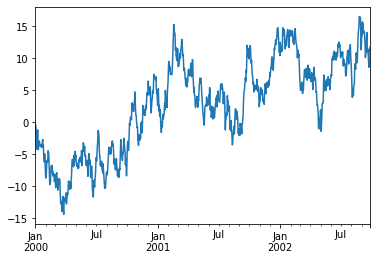

In [98]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

In [100]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df

,A,B,C,D
2000-01-01,0.717772,2.038926,-0.259700,-0.070222
2000-01-02,0.860023,1.746867,0.910484,0.307062
2000-01-03,1.721350,1.751147,3.075862,-0.942631
2000-01-04,0.962526,1.802560,3.261065,-1.134869
2000-01-05,-0.849919,2.766780,1.674318,-0.630453
...,...,...,...,...
2002-09-22,-21.016285,-10.892514,-6.232228,-8.641628
2002-09-23,-21.499203,-11.654674,-7.185215,-8.533710
2002-09-24,-22.249139,-13.112659,-4.997230,-8.127319
2002-09-25,-22.774454,-12.129866,-5.451044,-7.920727


<Figure size 432x288 with 0 Axes>

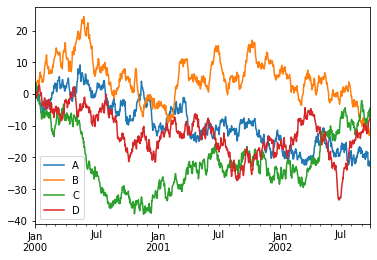

In [101]:
plt.figure(); df.plot(); plt.legend(loc='best')

# 11. 데이터 입출력

### 11.1 CSV

In [ ]:
df.read_csv('foo.csv')
df.to_csv('foo.csv')